In [10]:
## Loading in DAtaset
import pandas as pd
df = pd.read_csv("Books_Data_Clean.csv")
print(df.columns)
df[0:60]

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
5,5,2015.0,Red Queen,Victoria Aveyard,eng,Intermediate,4.08,83354,genre fiction,19960.00,0.000,4.99,5,"Amazon Digital Services, Inc.",4000
6,6,2011.0,The Power of Habit,Charles Duhigg,eng,Intermediate,4.03,155977,genre fiction,27491.67,16495.002,6.99,6,HarperCollins Publishers,3933
7,7,1994.0,Midnight in the Garden of Good and Evil,John Berendt,eng,Intermediate,3.90,167997,nonfiction,26182.00,15709.200,6.89,8,Hachette Book Group,3800
8,8,2012.0,Hopeless,Colleen Hoover,eng,Intermediate,4.34,189938,genre fiction,26093.67,15656.202,6.99,9,HarperCollins Publishers,3733
9,9,1905.0,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",eng,Intermediate,4.20,199872,genre fiction,23792.34,14275.404,6.49,10,Random House LLC,3666


In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Suppose df is your DataFrame

# 1) Choose numeric and categorical columns
numeric_cols = ["Book_average_rating", "units sold"]
cat_cols = ["genre", "Author_Rating"]

# 2) Scale numeric features
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3) One-hot encode categorical features
#    Replace sparse=False with sparse_output=False in newer scikit-learn
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(df[cat_cols])

# 4) Combine numeric + categorical
import numpy as np
numeric_matrix = df[numeric_cols].values
feature_matrix = np.hstack([numeric_matrix, encoded_cats])

# 5) Compute cosine similarity
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

print(cosine_sim.shape)
print("Cosine similarity between book 0 and book 1:", cosine_sim[0, 1])


(1070, 1070)
Cosine similarity between book 0 and book 1: 0.520806153698762


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your DataFrame (adjust the filename/path as needed)
df = pd.read_csv("Books_Data_Clean.csv")

# 1) Choose numeric columns
numeric_cols = ["Book_average_rating", "units sold"]

# 2) Scale numeric features
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3) Preprocess and encode categorical features

# For the "genre" column: convert to string, fill missing values, then split on comma 
df["genre"] = df["genre"].astype(str).fillna("")
df["genre"] = df["genre"].apply(lambda x: [g.strip() for g in x.split(",") if g.strip()])

# Use MultiLabelBinarizer to create a multi-hot encoding for genres
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(df["genre"])

# For the "Author_Rating" column: ensure it's a string and fill missing values
df["Author_Rating"] = df["Author_Rating"].astype(str).fillna("")
encoder = OneHotEncoder(sparse_output=False)
encoded_author_rating = encoder.fit_transform(df[["Author_Rating"]])

# Combine the categorical features: genres and author rating
encoded_cats = np.hstack([encoded_genres, encoded_author_rating])

# 4) Combine numeric and categorical features into one feature matrix
numeric_matrix = df[numeric_cols].values
feature_matrix = np.hstack([numeric_matrix, encoded_cats])

# 5) Compute cosine similarity on the combined feature matrix
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# 6) Input custom book indices
book_idx1 = int(input("Enter the first book index: "))
book_idx2 = int(input("Enter the second book index: "))

# Retrieve the corresponding book names from the DataFrame
book_name1 = df["Book Name"].iloc[book_idx1]
book_name2 = df["Book Name"].iloc[book_idx2]

print(f"Cosine similarity between '{book_name1}' and '{book_name2}': {cosine_sim[book_idx1, book_idx2]}")


Cosine similarity between 'Beowulf' and 'Batman: Year One': 0.520806153698762


c:\Users\josep\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.draw()
c:\Users\josep\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.draw()
c:\Users\josep\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.draw()
c:\Users\josep\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.draw()
c:\Users\josep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\josep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\josep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: 

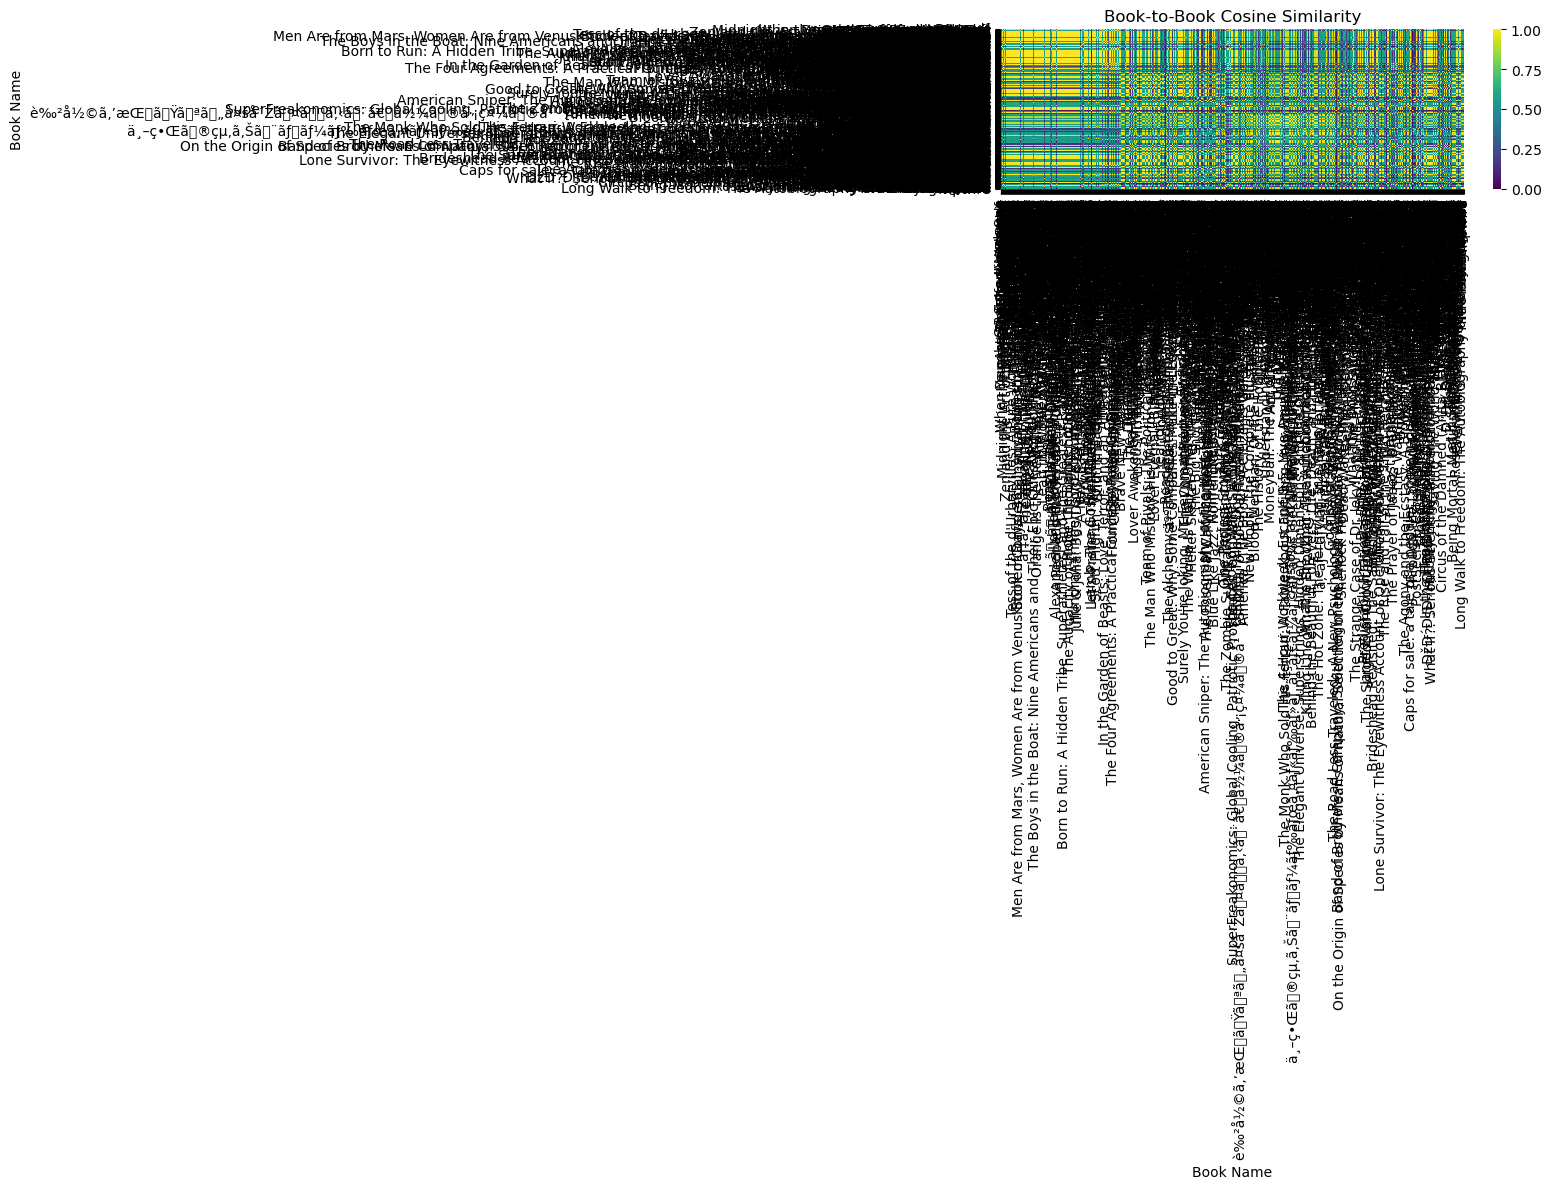

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load your dataset
df = pd.read_csv("Books_Data_Clean.csv")

# 2) Basic preprocessing (example: scale numeric columns, multi-hot encode genres, etc.)
numeric_cols = ["Book_average_rating", "units sold"]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df["genre"] = df["genre"].astype(str).fillna("")
df["genre"] = df["genre"].apply(lambda x: [g.strip() for g in x.split(",") if g.strip()])
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(df["genre"])

df["Author_Rating"] = df["Author_Rating"].astype(str).fillna("")
encoder = OneHotEncoder(sparse_output=False)
encoded_author_rating = encoder.fit_transform(df[["Author_Rating"]])

# Combine numeric + categorical
numeric_matrix = df[numeric_cols].values
encoded_cats = np.hstack([encoded_genres, encoded_author_rating])
feature_matrix = np.hstack([numeric_matrix, encoded_cats])

# 3) Compute similarity
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# 4) Build a DataFrame for plotting
similarity_df = pd.DataFrame(cosine_sim, 
                             index=df["Book Name"], 
                             columns=df["Book Name"])

plt.figure(figsize=(16, 12))  # width=16 inches, height=12 inches
sns.heatmap(similarity_df, cmap="viridis", xticklabels=True, yticklabels=True)

# Optionally rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title("Book-to-Book Cosine Similarity")
plt.tight_layout()
plt.show()

Cosine similarity matrix:
[[1.         0.18142345]
 [0.18142345 1.        ]]


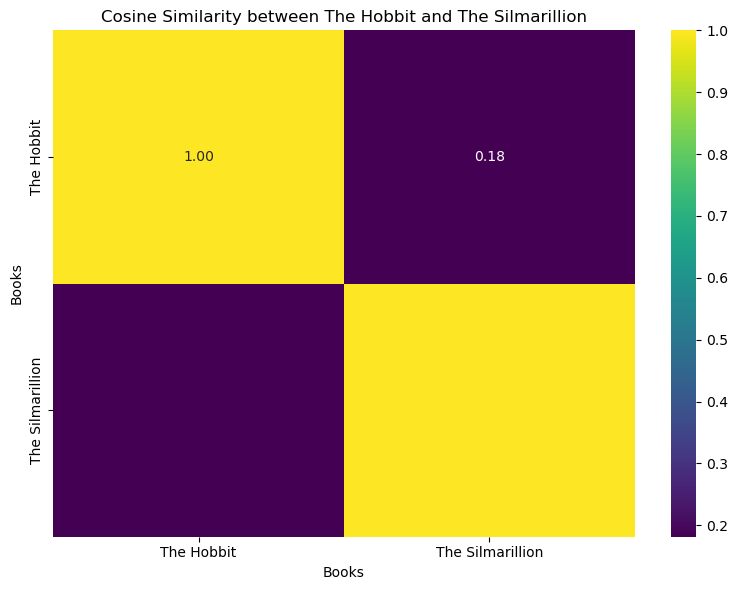

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to truncate text (e.g., first 10,000 words)
def truncate_text(text, num_words=10000):
    words = text.split()
    return " ".join(words[:num_words])

# Read the texts from the files (make sure the files are in your working directory)
with open("WarOfWorlds.txt", encoding="utf-8") as f:
    hobbit_text = f.read()

with open("TheSimarillion.txt", encoding="utf-8") as f:
    simarillion_text = f.read()

# Truncate the texts for quicker processing (if needed)
hobbit_trunc = truncate_text(hobbit_text, num_words=10000)
simarillion_trunc = truncate_text(simarillion_text, num_words=10000)

# Prepare the list of documents and their names
texts = [hobbit_trunc, simarillion_trunc]
book_names = ["The Hobbit", "The Silmarillion"]

# Create a TF-IDF vectorizer (removing common English stop words)
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(texts)

# Compute the cosine similarity matrix
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("Cosine similarity matrix:")
print(cos_sim)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim, annot=True, fmt=".2f", xticklabels=book_names, yticklabels=book_names, cmap="viridis")
plt.title("Cosine Similarity between The Hobbit and The Silmarillion")
plt.xlabel("Books")
plt.ylabel("Books")
plt.tight_layout()
plt.show()



--- Original DataFrame Columns ---
Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 

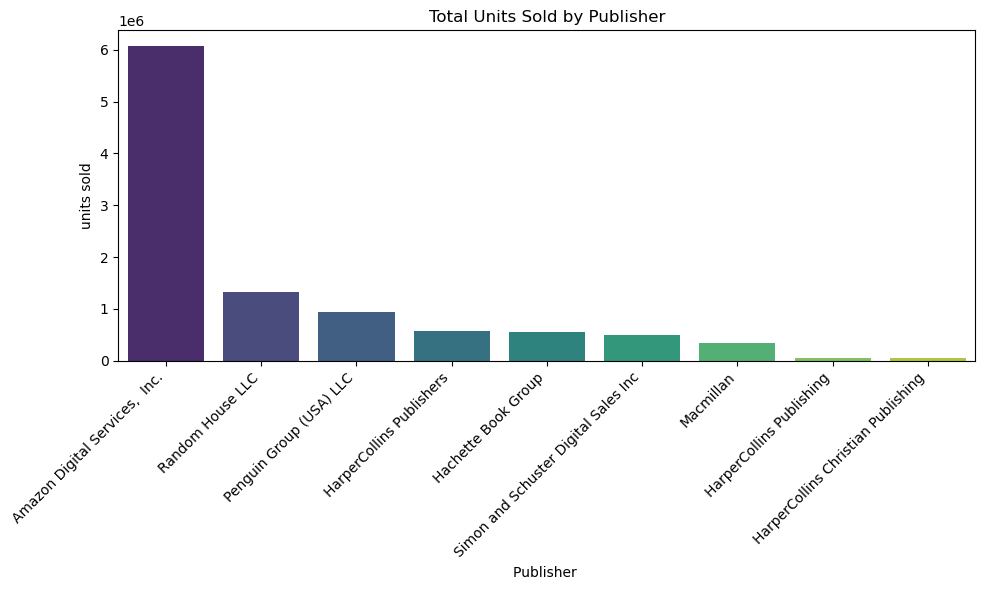

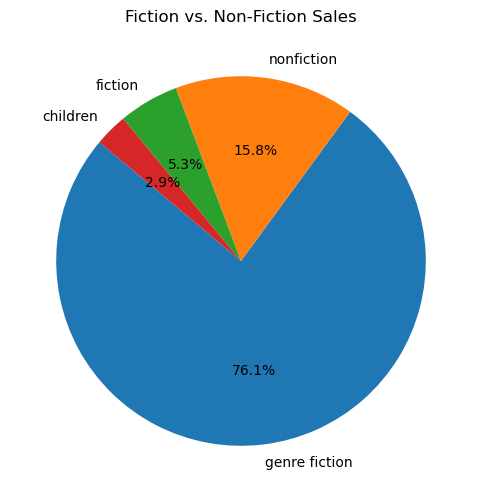

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    # =========================================================================
    # 1. Load the Dataset
    # =========================================================================
    # Replace 'books_data.csv' with your actual CSV file name/path
    df = pd.read_csv('Books_Data_Clean.csv')

    # Look at the columns
    print("\n--- Original DataFrame Columns ---")
    print(df.columns)

    # Look at the DataFrame info
    print("\n--- DataFrame Info ---")
    print(df.info())

    # Look at the first few rows
    print("\n--- First Few Rows ---")
    print(df.head())

    # =========================================================================
    # 2. Drop Duplicate Columns
    # =========================================================================
    # From your screenshot, it looks like these duplicates might exist:
    #   - 'publisher' vs. 'Publisher'
    #   - 'unitsSold' vs. 'unitsSold.1'
    #   - 'genre' vs. 'genre.1'
    #
    # We'll keep 'Publisher', 'unitsSold', and 'genre' as the primary columns
    # and drop the lowercase or suffix versions if they exist.
    columns_to_drop = ['publisher ', 'unitsSold.1', 'genre.1']
    # Drop them if they exist, ignoring errors if they don't
    df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

    print("\n--- Cleaned DataFrame Columns ---")
    print(df.columns)

    # Double-check that we have the columns we need
    required_cols = ['Publisher ', 'units sold', 'genre', 'Book Name']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Required column '{col}' not found in DataFrame after cleanup!")

    # =========================================================================
    # 3. Which Publishers Sell the Most Units?
    # =========================================================================
    # Group by the 'Publisher' column, sum the 'unitsSold', and sort descending.
    publisher_sales = (
        df.groupby('Publisher ')['units sold']
          .sum()
          .reset_index()
          .sort_values('units sold', ascending=False)
    )

    print("\n--- Total Units Sold by Publisher ---")
    print(publisher_sales)

    # =========================================================================
    # 4. Compare Fiction vs. Non-Fiction Sales
    # =========================================================================
    # Assuming 'genre' contains "genre fiction" or "genre nonfiction".
    genre_sales = (
        df.groupby('genre')['units sold']
          .sum()
          .reset_index()
          .sort_values('units sold', ascending=False)
    )

    print("\n--- Total Units Sold by Genre ---")
    print(genre_sales)

    # =========================================================================
    # 5. Book That Sold the Most Units
    # =========================================================================
    top_5_books = df.sort_values(by='units sold', ascending=False).head(5)

    print("\n--- Top 5 Best-Selling Books ---")
    for i, row in top_5_books.iterrows():
        print(f"'{row['Book Name']}' by {row['Author']} with {row['units sold']} units sold.")

    # =========================================================================
    # 6. Highest grossing author
    # =========================================================================
    # Calculate revenue per author by grouping and summing
    author_revenue = df.groupby('Author')['gross sales'].sum().reset_index()

    # Sort the authors by revenue in descending order
    author_revenue_sorted = author_revenue.sort_values(by='gross sales', ascending=False)

    # Get the highest grossing author (the first row after sorting)
    highest_grossing_author = author_revenue_sorted.iloc[0]

    print("\n--- Highest Grossing Author ---")
    print(f"{highest_grossing_author['Author']} is the highest grossing author with a total revenue of {highest_grossing_author['gross sales']}.")


    # =========================================================================
    # 7. Optional: Visualization
    # =========================================================================

    # a) Bar Chart: Publisher Sales
    plt.figure(figsize=(10, 6))
    sns.barplot(data=publisher_sales, x='Publisher ', y='units sold', palette='viridis')
    plt.title("Total Units Sold by Publisher")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # b) Pie Chart: Fiction vs. Non-Fiction
    # Only make a pie chart if you truly have two or few categories
    plt.figure(figsize=(6, 6))
    plt.pie(
        genre_sales['units sold'],
        labels=genre_sales['genre'],
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title("Fiction vs. Non-Fiction Sales")
    plt.show()


if __name__ == '__main__':
    main()


In [63]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

def load_text(filepath):
    """Loads the entire text from a file."""
    with open(filepath, 'r', encoding='utf-8') as f:
        return f.read()

def chunk_text(text, chunk_size=2000):
    """
    Splits text into multiple chunks of approximately `chunk_size` words.
    Returns a list of chunk strings.
    """
    words = text.split()
    chunks = []
    for i in range(0, len(words), chunk_size):
        chunk_words = words[i:i+chunk_size]
        chunk_str = " ".join(chunk_words)
        chunks.append(chunk_str)
    return chunks

def remove_fanboys(chunk):
    """
    Removes FANBOYS from a single chunk of text.
    FANBOYS = {for, and, nor, but, or, yet, so}.
    """
    fanboys = {"for", "and", "nor", "but", "or", "yet", "so"}
    tokens = chunk.split()
    # Filter out tokens that match any FANBOYS word (case-insensitive)
    filtered_tokens = [t for t in tokens if t.lower() not in fanboys]
    return " ".join(filtered_tokens)

def main():
    # -----------------------------------------------------------------------
    # 1. Load Tolkien Texts
    # -----------------------------------------------------------------------
    # We'll take two works for training, one for testing.
    # Adjust file paths as needed:
    tolkien_1 = load_text("Hobbit.txt")  # e.g., The Hobbit
    tolkien_2 = load_text("TheSimarillion.txt")  # e.g., The Silmarillion
    tolkien_3 = load_text("fellowship.txt")  # e.g., Fellowship of the Ring

    # -----------------------------------------------------------------------
    # 2. Chunk the first two texts for training
    # -----------------------------------------------------------------------
    chunks_1 = chunk_text(tolkien_1, chunk_size=2000)
    chunks_2 = chunk_text(tolkien_2, chunk_size=2000)
    train_texts = chunks_1 + chunks_2
    print(f"Number of training chunks (raw): {len(train_texts)}")

    # 2b. Remove FANBOYS from each training chunk
    train_texts = [remove_fanboys(chunk) for chunk in train_texts]

    # -----------------------------------------------------------------------
    # 3. Prepare the test text (third Tolkien work)
    # -----------------------------------------------------------------------
    test_chunks = chunk_text(tolkien_3, chunk_size=2000)
    print(f"Number of test chunks (raw): {len(test_chunks)}")

    # Remove FANBOYS from each test chunk
    test_chunks = [remove_fanboys(chunk) for chunk in test_chunks]

    # -----------------------------------------------------------------------
    # 4. TF-IDF Vectorization
    # -----------------------------------------------------------------------
    # Fit ONLY on the training data (to simulate real one-class scenario).
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    X_train = vectorizer.fit_transform(train_texts)

    # Transform the test chunks with the same vectorizer
    X_test = vectorizer.transform(test_chunks)

    # -----------------------------------------------------------------------
    # 5. Train a One-Class SVM
    # -----------------------------------------------------------------------
    # We'll expect the training data to represent "inliers" (Tolkien).
    one_class_model = OneClassSVM(kernel='linear', nu=0.1)
    one_class_model.fit(X_train)

    # -----------------------------------------------------------------------
    # 6. Predict on Test Chunks
    # -----------------------------------------------------------------------
    # +1 = inlier, -1 = outlier
    y_pred = one_class_model.predict(X_test)

    # We know these test chunks are also Tolkien, so let's label them all +1
    y_true = [1] * len(test_chunks)

    print("\n--- One-Class SVM Predictions on Tolkien_3 Chunks (After Removing FANBOYS) ---")
    print("Predicted labels (1 = inlier, -1 = outlier):", y_pred)

    # Evaluate: classification_report
    print("\nClassification Report (treating 1 as 'Tolkien'):")
    # Only 1 class in y_true, so the report is limited, but still useful:
    print(classification_report(y_true, y_pred, labels=[1, -1]))

    # Check how many chunks are recognized as inliers
    num_inliers = sum(1 for p in y_pred if p == 1)
    print(f"\nOut of {len(test_chunks)} test chunks, {num_inliers} were predicted as inliers.")

if __name__ == "__main__":
    main()


Number of training chunks (raw): 137
Number of test chunks (raw): 99

--- One-Class SVM Predictions on Tolkien_3 Chunks (After Removing FANBOYS) ---
Predicted labels (1 = inlier, -1 = outlier): [-1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]

Classification Report (treating 1 as 'Tolkien'):
              precision    recall  f1-score   support

           1       1.00      0.25      0.40        99
          -1       0.00      0.00      0.00         0

    accuracy                           0.25        99
   macro avg       0.50      0.13      0.20        99
weighted avg       1.00      0.25      0.40        99


Out of 99 test chunks, 25 were predicted as inliers.


c:\Users\josep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dataset shape: (20, 2)
                                                text   author
0  THE HOBBIT OR THERE AND BACK AGAIN BY J.R.R. T...  Tolkien
1  Bilbo apologetically. “We like the dark,” said...  Tolkien
2  their hopes. Their bags were filled with food ...  Tolkien
3  Really it was only a leak of sunshine in throu...  Tolkien
4  I haven’t ventured to introduce them before, b...  Tolkien
TF-IDF matrix shape: (20, 10000)

Classification Report:
              precision    recall  f1-score   support

     Herbert       1.00      1.00      1.00         2
     Tolkien       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]
